In [1]:
import colorcet
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import jismesh.utils as ju
import datashader as ds
from tqdm import tqdm

In [2]:
population = np.load("ntt_mss_2019.npy")
areas = np.load("ntt_mss_2019_areas.npy")

In [3]:
population.max()

89567

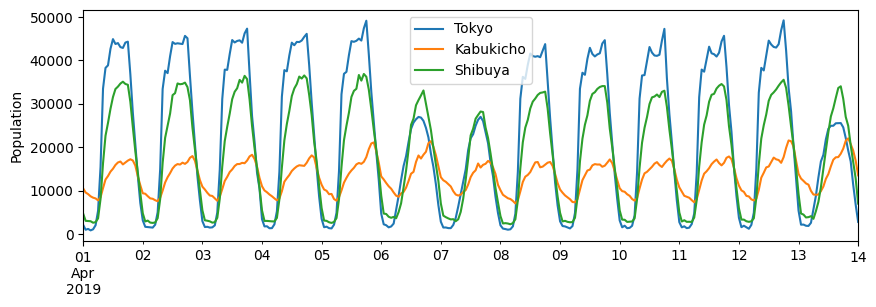

In [7]:
# 青葉山駅 574036064
# 川内駅 574036181
# 東京駅 533946113
# 歌舞伎町 533945363
# 渋谷駅 533935961

aobayama = np.where(areas == 574036064)[0][0]
tokyo = np.where(areas == 533946113)[0][0]
kabukicho = np.where(areas == 533945363)[0][0]
shibuya = np.where(areas == 533935961)[0][0]

df = pd.DataFrame(data=population[:, [tokyo, kabukicho, shibuya]], columns=["Tokyo", "Kabukicho", "Shibuya"],
                  index=pd.date_range(start="2019-01-01", end="2020-01-01", inclusive="left", freq="H")) 
df.loc[pd.date_range(start="2019-4-1", end="2019-4-14", freq="H")].plot(figsize=(10,3))
plt.ylabel("Population");

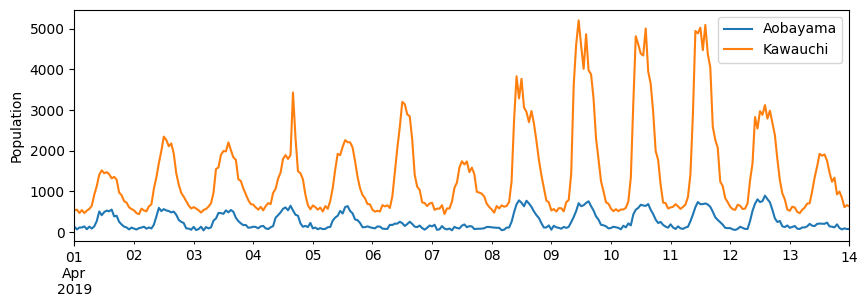

In [4]:
aobayama = np.where(areas == 574036064)[0][0]
kawauchi = np.where(areas == 574036181)[0][0]

df = pd.DataFrame(data=population[:, [aobayama, kawauchi]], columns=["Aobayama", "Kawauchi"],
                  index=pd.date_range(start="2019-01-01", end="2020-01-01", inclusive="left", freq="H")) 
df.loc[pd.date_range(start="2019-4-1", end="2019-4-14", freq="H")].plot(figsize=(10,3))
plt.ylabel("Population");

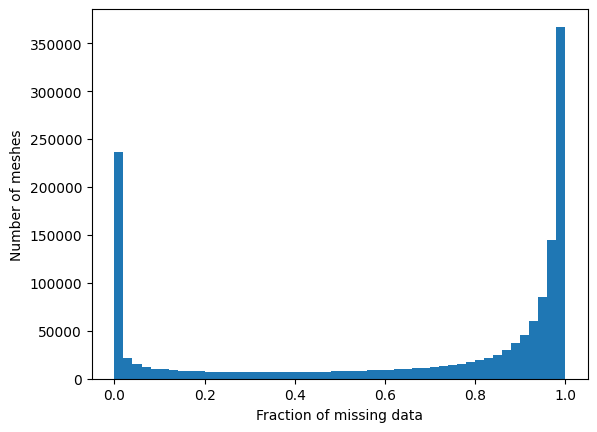

In [5]:
missing = np.count_nonzero(population == -1, axis=0) / population.shape[0]
plt.hist(missing, bins=50)
plt.xlabel("Fraction of missing data")
plt.ylabel("Number of meshes");

In [6]:
lats, lons = ju.to_meshpoint(areas, 0.5, 0.5)

In [ ]:
df = pd.DataFrame({
    "latitude": lats,
    "longitude": lons,
    "population": np.maximum(population[0, :], 0)
})

# df = df.query("38.030350 < latitude < 38.478922 and 140.700471 < longitude < 141.217345")

cvs = ds.Canvas(plot_width=1000, plot_height=1000)
agg = cvs.points(df, "longitude", "latitude", agg=ds.sum("population"))
# img = ds.tf.set_background(ds.tf.shade(agg, cmap=colorcet.fire, how="log"), "black")
img = ds.tf.shade(agg, cmap=colorcet.fire)

ds.utils.export_image(img, filename="foo", background="black")

In [105]:
for i in tqdm(range(90 * 24)):
    df = pd.DataFrame({
        "latitude": lats,
        "longitude": lons,
        "population": np.maximum(population[i, :], 0)
    })
    
    cvs = ds.Canvas(plot_width=1000, plot_height=1000)
    agg = cvs.points(df, "longitude", "latitude", agg=ds.sum("population"))
    img = ds.tf.shade(agg, cmap=colorcet.fire)
    
    ds.utils.export_image(img, filename=f"pop_{i:04}", background="black")

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2160/2160 [05:30<00:00,  6.54it/s]
